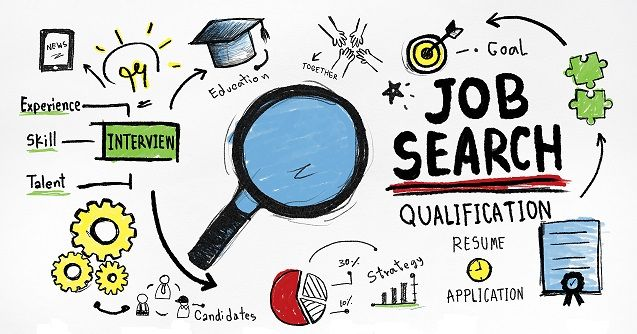

In [19]:
from IPython.display import Image, display

display(Image(filename=r"C:\Users\ADMIN\Documents\Moringa School\Phase 3\P3 Project\Images\Get Hired! #HireMe.jpeg"))

## Project Goal
The objective for this project is to build a machine learning model that predicts whether a job applicant is suitable for a particular role based on their background information. This predictive model will suport recruitment platforms and HR tech firms in streamlining candidate screening, reducing manual workload, and increasing the quality of the shortlisted candidates.

## Overview
This project analyzes job candidates' data to determine their suitability for a job role. The dataset, obtained from Kaggle, includes various candidate attributes suc as education, major, ryears of experience and skills. By applying classification algorithms and experimenting with different preprocessing techniques and model types( eg: logistic regression, decision trees, ensemble models), this analysis aims to develop a robust model that predicts suitability with high accuracy.

Key project activities include:
- Data cleaning and preprocessing
- Exploratory data analysis(EDA) to identify patterns
- Model development and evaluation
- Hyperparameter tuning and performance optimization

## 1. Business Understanding
Recruiting companies and HR tech startups face increasing challenges in efficiently screening high volumes of job applications. Manual resume screening is time consuming, inconsistet, and ofetn biased. Automating this step with a data-driven approach can drastically improve the speed and quality of candidate selection.

This analysis addresses the following business questions:
1. Can we build a reliable model that predicts candidate suitability based on resume attributes?
2. What candidate features(e.g., education,experience, skills) are most indicative of suitability?
3. How does model performance vary between different classification techniques?

By answering these questions, this project supports the development of smart hiring system that reduce time-to-hire, improve matching quality, and increase recruiter productivity.

## 2. Data Understanding
The dataset used for this project is the [HR Job Candidate Dataset](https://www.kaggle.com/datasets/arashnic/hr-analytics-job-change-of-data-scientists?resource=download) from Kaggle. It contains information on job applicants including:

- **Candidate Features**: education level, major, university tier, years of experience, industry, gender, job roles, etc.
- **Target Variable**: (1 = Suitable, 0 = Not Suitable)

We combined the training (`aug_train.csv`) and testing (`aug_test.csv`) datasets into a single DataFrame for comprehensive analysis and feature engineering. This helps us understand the overall data structure and patterns more effectively before splitting again for modeling.

**Data Understanding Steps:**
1. **Class Distribution**: Understand the proportion of suitable vs not suitable candidates in the training set.
2. **Missing Value Analysis**: Identify and address any missing values in key features such as education or experience.
3. **Categorical Feature Encoding**: Prepare categorical variables (e.g., education level, company type) using appropriate encoding methods.
4. **Correlation and Feature Insights**: Explore relationships between features and the target variable to guide modeling decisions.


## 3. Data Preparation
Loading the dataset

In [20]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline

# Load and combine the datasets
train_df = pd.read_csv('Data/aug_train.csv')
test_df = pd.read_csv ('Data/aug_test.csv')
df = pd.concat([train_df, test_df], ignore_index=True)

# Display the first few rows of the data
df.head()


,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [21]:
# Show number of rows and columns
df.shape 

(21287, 14)

In [22]:
# Statistical Summary of the data
df.describe()

,enrollee_id,city_development_index,training_hours,target
count,21287.000000,21287.000000,21287.000000,19158.000000
mean,16873.983652,0.828462,65.328510,0.249348
std,9612.131237,0.123537,60.075201,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.500000,0.739000,23.000000,0.000000
50%,16967.000000,0.903000,47.000000,0.000000
75%,25161.500000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [23]:
# Summary of the data
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21287 entries, 0 to 21286
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             21287 non-null  int64  
 1   city                    21287 non-null  object 
 2   city_development_index  21287 non-null  float64
 3   gender                  16271 non-null  object 
 4   relevent_experience     21287 non-null  object 
 5   enrolled_university     20870 non-null  object 
 6   education_level         20775 non-null  object 
 7   major_discipline        18162 non-null  object 
 8   experience              21217 non-null  object 
 9   company_size            14727 non-null  object 
 10  company_type            14513 non-null  object 
 11  last_new_job            20824 non-null  object 
 12  training_hours          21287 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

### a. Data Cleaning: Missing Values

We begin by checking for missing values in the dataset. Identifying these is crucial because columns with many missing values might require special handling such as imputation or removal to ensure model quality.


In [24]:
df.isna().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    5016
relevent_experience          0
enrolled_university        417
education_level            512
major_discipline          3125
experience                  70
company_size              6560
company_type              6774
last_new_job               463
training_hours               0
target                    2129
dtype: int64

In [25]:
#Checking missing value proportions per column, sorted in descending order
missing = df.isna().mean().sort_values(ascending=False)
missing

company_type              0.318222
company_size              0.308169
gender                    0.235637
major_discipline          0.146803
target                    0.100014
education_level           0.024052
last_new_job              0.021750
enrolled_university       0.019589
experience                0.003288
enrollee_id               0.000000
city                      0.000000
city_development_index    0.000000
relevent_experience       0.000000
training_hours            0.000000
dtype: float64

Although several columns have missing values, particularly in categorical fields like `company_type`, `company_size`, and `gender`, **none will be dropped**. Dropping them would result in significant data loss. Instead, we will handle missing values through appropriate imputation strategies to retain as much information as possible for model training.

In [26]:
# Drop rows where target is NaN
df = df.dropna(subset=['target'])

# Redefine features and target
X = df.drop('target', axis=1)
y = df['target']


### Replacing the null values
For the rest of the data we replace the null values with the string 'Missing' as dropping or replacing the data may greatly affect the analysis.

In [27]:
# Defining columns that are categorical and those that are ordinal
categorical_cols = [
    'gender', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline', 'company_type','company_size'
]

ordinal_cols = ['experience', 'last_new_job']

# Fill null values in categorical with "Missing"
df[categorical_cols] = df[categorical_cols].fillna('Missing')

#Fill null values in ordinal with "Unknown"
df[ordinal_cols] = df[ordinal_cols].fillna('Unknown')

In [28]:
df.isna().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

### b) Feature Engineering

Feature engineering is a critical step that helps extract meaningful signals from the data to improve model performance. In this project, we engineered new features and transformed existing ones based on domain knowledge and data patterns.

**Key Activities:**
- Created interaction terms between related numerical variables.
- Transformed experience-related columns into numerical format.
- Encoded categorical variables for model compatibility.
- Removed unnecessary or highly correlated features.


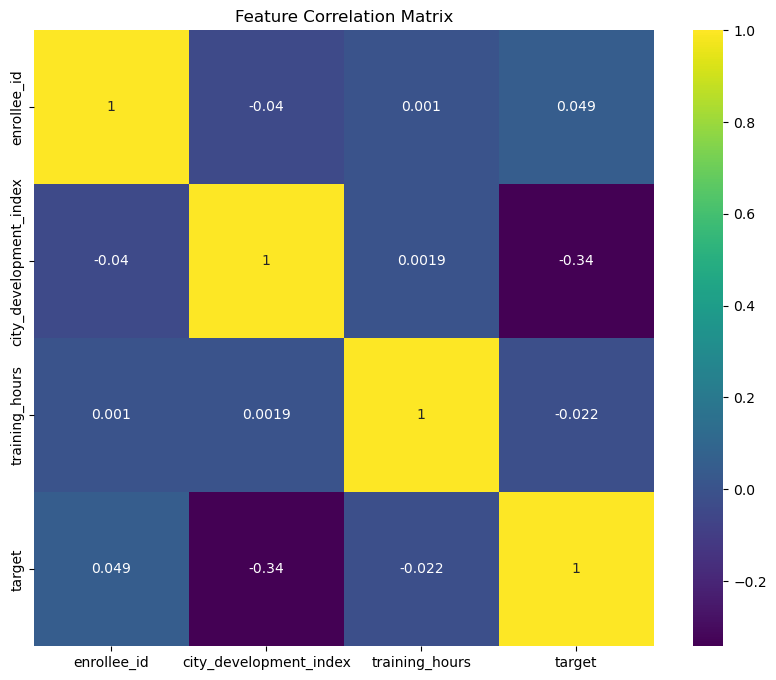

In [29]:
#Checking for Correlation
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='viridis')  # corrected 'viridism' to 'viridis'
plt.title('Feature Correlation Matrix')
plt.show()

### Insights from Correlation Heatmap

- **`city_development_index`**: Shows a  **negative correlation** with the target variable. This may suggest that candidates from more developed cities are less likely to be considered suitable.

- **`training_hours`**: Displays a **very weak negative correlation** with the target. This implies almost **no linear relationship**, though the variable may still contribute in interaction terms or non-linear models.

- **`enrollee_id`**: Has **almost no correlation** with the target and serves as a unique identifier. It does not provide predictive value and will therefore be **dropped from the dataset**.


In [30]:
# Drop the identifier column as it does not contribute to prediction
df.drop(columns=['enrollee_id'], inplace=True)

In [31]:
# Make a copy of the cleaned dataset
data = df.copy()

In [32]:

# Define categorical features to encode
categorical_features = [
    'gender', 'relevent_experience', 'enrolled_university',
    'education_level', 'major_discipline', 'company_type',
    'company_size', 'city'
]

# Ensure these columns exist before encoding
missing_cols = [col for col in categorical_features if col not in data.columns]
print("Missing columns:", missing_cols)  # Optional: check if any are missing

# Apply one-hot encoding only if all columns are present
data = pd.get_dummies(data, columns=categorical_features, drop_first=True)

# After encoding, keep only numeric columns (just in case)
import numpy as np
data = data.select_dtypes(include=[np.number])

# Preview the final structure
data.head()


Missing columns: []


,city_development_index,training_hours,target
0,0.920,36,1.0
1,0.776,47,0.0
2,0.624,83,0.0
3,0.789,52,1.0
4,0.767,8,0.0


**Defining X and y (Performing a train_test split)**

In this section, the features and target variable are defined then then data is split for a train_test_split. The data is also normalized by applying a scaler.


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define target and features
X = df.drop('target', axis=1)
y = df['target']

# Drop non-numeric or process categorical columns before scaling
X = X.select_dtypes(include=['float64', 'int64'])  

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### 4. Modelling
**Model Selection and Evaluation**
Since we aim to predict whether a job applicant is suitable for a position based on various features: demographic, educational and professional features. 

We'll evaluate four classification models commonly used in binary classification tasks:

- Logistic Regression

- Random Forest Classifier

- Decision Tree Classifier

- Gradient Boosting Classifier

*a)  Logistic Regression*

This is a simple yet powerful linear model used for binary classification. It is a good starting point because:

- It is easy to implement and interpret

- It performs well when the relationship between the input features and the output is approximately linear

- It provides baseline metrics to compare against more complex models

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score


# Train the model on scaled data
lr = LogisticRegression(random_state=42, class_weight='balanced', max_iter=1000)
lr.fit(X_train_scaled, y_train)

# Predict and evaluate
lr_pred = lr.predict(X_test_scaled)
print("Logistic Regression Performance:")
print(confusion_matrix(y_test, lr_pred))
print(classification_report(y_test, lr_pred))
print(f"ROC-AUC: {roc_auc_score(y_test, lr.predict_proba(X_test_scaled)[:, 1]):.4f}")

Logistic Regression Performance:
[[3233 1067]
 [ 636  812]]
              precision    recall  f1-score   support

         0.0       0.84      0.75      0.79      4300
         1.0       0.43      0.56      0.49      1448

    accuracy                           0.70      5748
   macro avg       0.63      0.66      0.64      5748
weighted avg       0.73      0.70      0.72      5748

ROC-AUC: 0.6719


**Interpretation**

The Logistic Regression model has an overall accuracy of 70%, performing well in identifying applicants who are **Not Suitable** (Class 0), with a high precision of 84% and recall of 75%.

It struggles however to identify **Suitable** (Class 1), with a low precision of 43% and a recall of 56%, indicating a high rate of false positives and missed suitable applicants.

The ROC-AUC score of 67%, suggests that the model can distinguish between two classes, but not a highly reliable level.

The model offers a useful baseline however may not be ideal in scenarios where the  correctly identifying suitable candidates is critical and more complex odels may be required for improved prediction accuracy.

*b) Decision Tree Classifier*

The Decision Tree algorithm is a non-linear, tree-based model that splits data based on feature values to make predictions. It’s intuitive, easy to visualize, and capable of capturing complex patterns in the data. Unlike Logistic Regression, Decision Trees can handle both numerical and categorical data without requiring feature scaling but has been used for consistency.

In the context of predicting job applicant suitability, a Decision Tree can explore different decision paths (e.g., based on education level, experience, or company type) to classify candidates as either suitable (1) or not suitable (0). 

We evaluate its performance using accuracy, precision, recall, F1-score, and the ROC-AUC score to compare it with our logistic regression baseline.


In [38]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score

# Initialize and train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)

# Making predictions
dt_predictions = dt_model.predict(X_test_scaled)
dt_probabilities = dt_model.predict_proba(X_test_scaled)[:, 1]

# Evaluate model performance
print("Decision Tree Classifier Performance")
print("Confusion Matrix:")
print(confusion_matrix(y_test, dt_predictions))

print("\nClassification Report:")
print(classification_report(y_test, dt_predictions))

print(f" Accuracy: {accuracy_score(y_test, dt_predictions):.4f}")
print(f"ROC-AUC Score: {roc_auc_score(y_test, dt_probabilities):.4f}")


Decision Tree Classifier Performance
Confusion Matrix:
[[3772  528]
 [ 980  468]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.79      0.88      0.83      4300
         1.0       0.47      0.32      0.38      1448

    accuracy                           0.74      5748
   macro avg       0.63      0.60      0.61      5748
weighted avg       0.71      0.74      0.72      5748

 Accuracy: 0.7376
ROC-AUC Score: 0.6362


**Interpretation**

The Decision Tree Classifier has an overall accuracy of 73.8%, shows an improvement from the logistic regression baseline. It performs well in identifying **Class 0** with a high recall of 88%.

The model struggles in identifying **Class 1**, having a 32% recall and precision of just 47%.

The ROC-AUC score of 63.6% indicates a relatively weak ability to differentiate between the two classes. This model would also slightly overlook the suitable candidates.

**c) Random Forest Classifier**

The Random Forest Classifier constructs multiple decision trees during training and outputs the majority vote for classification. This approach improves **generalization** and **reduces overfitting**, which are common drawbacks of individual decision trees.

Random Forest is particularly effective when dealing with **imbalanced datasets** by allowing the use of class weights, and it naturally handles both numerical and categorical variables. 

In the context of predicting job applicant suitability, it can better capture complex patterns in the data, leading to more reliable classification of both suitable and unsuitable candidates.

We will evaluate its performance using accuracy, precision, recall, F1-score, and ROC-AUC metrics.


In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(
    random_state=42,
    class_weight='balanced',
    n_estimators=100
)

# Train the model
rf_model.fit(X_train_scaled, y_train)

# Make predictions
rf_predictions = rf_model.predict(X_test_scaled)
rf_probabilities = rf_model.predict_proba(X_test_scaled)[:, 1]

# Evaluate model performance
print("Random Forest Classifier Performance")
print("Confusion Matrix:")
print(confusion_matrix(y_test, rf_predictions))

print("\nClassification Report:")
print(classification_report(y_test, rf_predictions))

print(f"Accuracy: {accuracy_score(y_test, rf_predictions):.4f}")
print(f"ROC-AUC Score: {roc_auc_score(y_test, rf_probabilities):.4f}")


Random Forest Classifier Performance
Confusion Matrix:
[[3183 1117]
 [ 745  703]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.81      0.74      0.77      4300
         1.0       0.39      0.49      0.43      1448

    accuracy                           0.68      5748
   macro avg       0.60      0.61      0.60      5748
weighted avg       0.70      0.68      0.69      5748

Accuracy: 0.6761
ROC-AUC Score: 0.6611


**Interpretation for Random Forest Classifier**
The Random Forest Classifier yields an overall accuracy of 67.6%, showing performance similar to the Decision Tree but with slight improvement in detecting suitable candidates (class 1). It achieves a recall of 49% for this class, meaning it identifies nearly half of the actual suitable candidates, better than the 32% recall seen with the Decision Tree. 

However, its low precision of 39% suggests it still misclassifies many unsuitable applicants as suitable. With a ROC-AUC score of 0.6611, the Random Forest still underperforms in balanced classification, indicating that further improvements, such as including categorical features or using boosting methods, may be necessary.

**d) Gradient Boosting Classifier**

Gradient Boosting builds a series of decision trees sequentially, where each tree corrects the errors of the previous one. Unlike Random Forest, which builds trees independently and averages their results, Gradient Boosting focuses on minimizing the loss by optimizing residuals.

This model is highly effective for handling complex, non-linear relationships in the data and is particularly useful for improving recall and precision on **minority classes**, such as identifying suitable job applicants in this case. We will start with a basic Gradient Boosting model and later explore hyperparameter tuning to enhance performance.


In [40]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score

# Define a basic hyperparameter grid
param_grid = {
    'n_estimators': [100],         
    'max_depth': [3],               
    'learning_rate': [0.1],         
    'min_samples_split': [2]        
}

# Initialize Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=gb_model,
    param_grid=param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)

# Train model using Grid Search
grid_search.fit(X_train_scaled, y_train)

# Retrieve best model
best_gb = grid_search.best_estimator_

# Make predictions
gb_predictions = best_gb.predict(X_test_scaled)
gb_probabilities = best_gb.predict_proba(X_test_scaled)[:, 1]

# Evaluate performance
print("Gradient Boosting Classifier Performance")
print("Confusion Matrix:")
print(confusion_matrix(y_test, gb_predictions))

print("\nClassification Report:")
print(classification_report(y_test, gb_predictions))

print(f"Accuracy: {accuracy_score(y_test, gb_predictions):.4f}")
print(f"ROC-AUC Score: {roc_auc_score(y_test, gb_probabilities):.4f}")



Gradient Boosting Classifier Performance
Confusion Matrix:
[[3848  452]
 [ 867  581]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.89      0.85      4300
         1.0       0.56      0.40      0.47      1448

    accuracy                           0.77      5748
   macro avg       0.69      0.65      0.66      5748
weighted avg       0.75      0.77      0.76      5748

Accuracy: 0.7705
ROC-AUC Score: 0.7181


**Interpretation from Gradient Boosting**

The Gradient Boosting Classifier outperforms previous models with an overall accuracy of 77.1% and the highest ROC-AUC score of 0.7181, indicating improved class separation. 

It performs strongly in identifying unsuitable applicants (class 0), achieving a recall of 89%. For suitable applicants (class 1), it improves upon earlier models with a precision of 56% and a recall of 40%, though this still indicates that many qualified candidates are being missed.

Overall, Gradient Boosting offers the most balanced performance so far and serves as a strong candidate for further improvement through hyperparameter tuning or inclusion of categorical features.


**Model Selection**

Based on the comparative analysis of model performance using accuracy, precision, recall, and ROC-AUC, the Gradient Boosting Classifier emerges as the best-performing model in this study. With an accuracy of 77.1% and the highest ROC-AUC score of 0.7181, it demonstrates the strongest overall ability to distinguish between suitable and unsuitable job applicants.

Gradient Boosting achieved a more balanced trade-off between false positives and false negatives, offering improved performance on the minority class (suitable applicants) compared to Logistic Regression and Decision Trees.

In the context of job applicant screening, where overlooking qualified candidates can lead to missed opportunities and biased hiring, Gradient Boosting offers a more reliable and equitable solution.

Given the need for a model that not only maintains high accuracy but also ensures fair classification across both classes, the Gradient Boosting Classifier is selected as the optimal model for deployment.



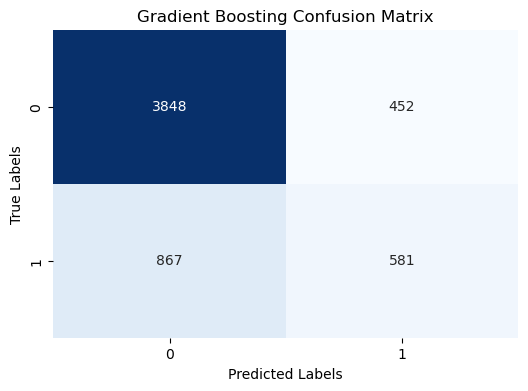

In [ ]:

# Generate confusion matrix for Gradient Boosting predictions
cm = confusion_matrix(y_test, gb_predictions)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Gradient Boosting Confusion Matrix')
plt.show()


The model does very well at identifying unsuitable candidates (high true negatives).


### 5. Visualization of relationships

**a) Distribution of Suitable vs. Not Suitable Applicants**

The chart below shows the distribution of suitable and not suitable job applicants based on the `target` variable.


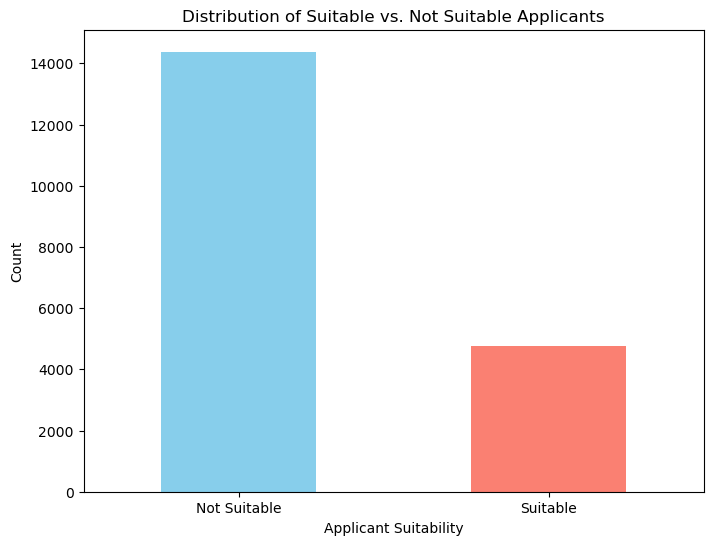

In [43]:
# Plot class distribution
plt.figure(figsize=(8, 6))
df['target'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])

plt.title('Distribution of Suitable vs. Not Suitable Applicants')
plt.xlabel('Applicant Suitability')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Not Suitable', 'Suitable'], rotation=0)
plt.show()


From the graph we can see that not suitable applicants were the majority compared to the suitable candidates.

**b) Distribution of Suitable vs Not Suitable Applicants by Relevant Experience**

To gain insights into which features may influence job applicant suitability, we can explore how applicant categories vary across different attributes. One such feature is `relevent_experience`, which indicates whether a candidate has prior experience relevant to the job.

The chart below shows how the distribution of suitable and not suitable applicants varies based on relevant experience.


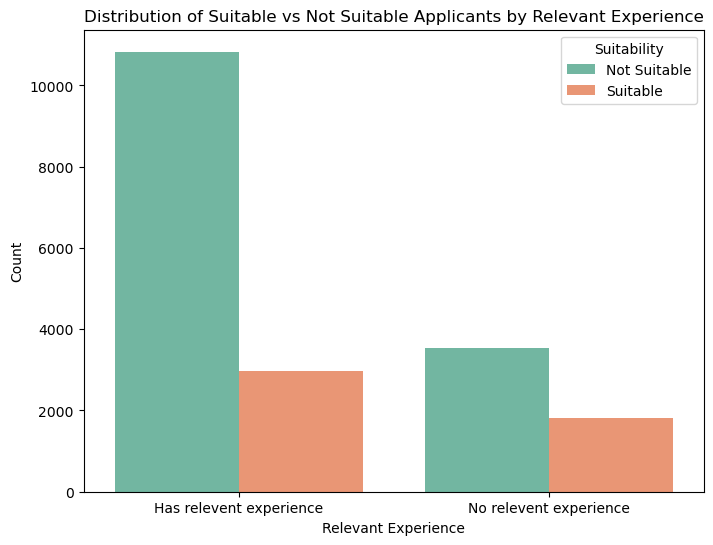

In [44]:
plt.figure(figsize=(8, 6))
sns.countplot(x='relevent_experience', hue='target', data=df, palette='Set2')
plt.title('Distribution of Suitable vs Not Suitable Applicants by Relevant Experience')
plt.xlabel('Relevant Experience')
plt.ylabel('Count')
plt.legend(title='Suitability', labels=['Not Suitable', 'Suitable'])
plt.show()


**c) Distribution of Suitable vs Not Suitable Applicants by University Enrollment**

Another feature that may influence job applicant suitability is their enrollment status in a university program. This could indicate ongoing skill development or recent education exposure, which may be relevant to job readiness.

The chart below shows how suitability classification varies across different university enrollment categories.


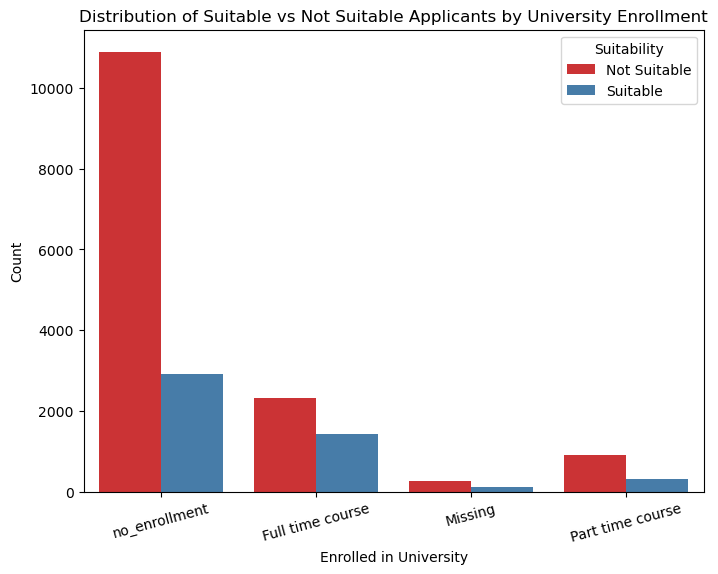

In [45]:
plt.figure(figsize=(8, 6))
sns.countplot(x='enrolled_university', hue='target', data=df, palette='Set1')
plt.title('Distribution of Suitable vs Not Suitable Applicants by University Enrollment')
plt.xlabel('Enrolled in University')
plt.ylabel('Count')
plt.legend(title='Suitability', labels=['Not Suitable', 'Suitable'])
plt.xticks(rotation=15)
plt.show()


**d) Distribution of Suitable vs Not Suitable Applicants by Company Type**

To better understand the context from which suitable and not suitable applicants originate, we can analyze their distribution across different company types. This helps uncover patterns such as which types of organizations tend to attract candidates who are considered more suitable for job roles.

The plots below show the top 10 company types associated with both suitable and not suitable applicants.


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_5360\2369863770.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_suitable_companies.values, y=top_suitable_companies.index, palette='Set2', ax=axs[0])
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_5360\2369863770.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_not_suitable_companies.values, y=top_not_suitable_companies.index, palette='Set2', ax=axs[1])


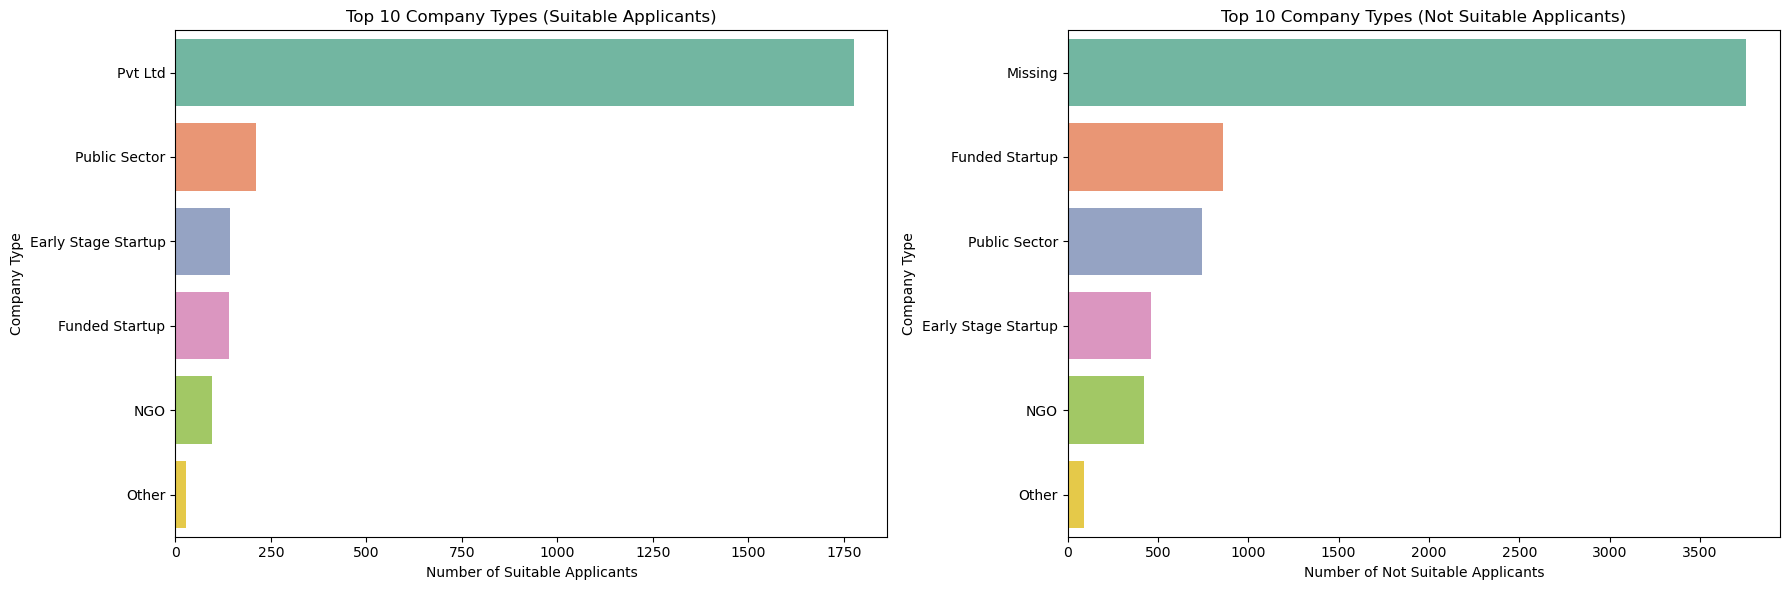

In [46]:
# Get the top 10 company types with most suitable applicants
top_suitable_companies = df[df['target'] == 1]['company_type'].value_counts().nlargest(11).iloc[1:]

# Get the top 10 company types with most not suitable applicants
top_not_suitable_companies = df[df['target'] == 0]['company_type'].value_counts().nlargest(11).iloc[1:]

# Create subplot
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

# Plot for suitable applicants
sns.barplot(x=top_suitable_companies.values, y=top_suitable_companies.index, palette='Set2', ax=axs[0])
axs[0].set_title('Top 10 Company Types (Suitable Applicants)')
axs[0].set_xlabel('Number of Suitable Applicants')
axs[0].set_ylabel('Company Type')

# Plot for not suitable applicants
sns.barplot(x=top_not_suitable_companies.values, y=top_not_suitable_companies.index, palette='Set2', ax=axs[1])
axs[1].set_title('Top 10 Company Types (Not Suitable Applicants)')
axs[1].set_xlabel('Number of Not Suitable Applicants')
axs[1].set_ylabel('Company Type')

# Improve layout
plt.tight_layout()
plt.show()


### 6. Conclusion

This project set out to answer three key questions about predicting candidate suitability using machine learning  and here’s what we found:

1. *Can we reliably predict candidate suitability?*

Yes , to a good extent. Using features from resumes and application profiles, we built models that predict suitability fairly well. Gradient Boosting stood out, with an accuracy of 77.1% and an ROC-AUC of 0.718, making it our most reliable model.

2. *What features matter most?*

Candidate experience, university enrollment, and the type of company they’ve worked for were especially telling. For example, applicants with relevant experience were more likely to be considered suitable not surprisingly, experience counts.

3. *How do different models perform?*

We tested four models : Logistic Regression, Decision Tree, Random Forest, and Gradient Boosting. Gradient Boosting came out on top, offering the best balance between accuracy and fairness in identifying both suitable and not suitable candidates. Simpler models struggled, especially with spotting qualified candidates.

Machine learning can support better hiring decisions, but choosing the right model and understanding the features behind it really makes a difference.

### 7. Business Recommendations
Based on the findings of this analysis, we propose the following actions to improve candidate screening processes:

- Adopt a machine learning–assisted screening tool using the Gradient Boosting model as a decision-support system, especially in high-volume applicant pipelines.

- Prioritize features like relevant experience, current education enrollment, and employment context (e.g., company type) when evaluating candidate suitability.

- Regularly retrain the model with updated data to reflect shifting job market trends, new hiring priorities, and emerging skills.



### 8. Suggestions for Further Analysis
To strengthen the model and its practical value, we recommend:

i. Feature engineering: Extract skills, certifications, or keywords from resumes using NLP to enhance prediction accuracy.

ii. Bias and fairness audits: Investigate model performance across gender, age groups, or education backgrounds to ensure equitable outcomes.

iii. Evaluate with business KPIs: Connect predictions to downstream hiring outcomes (e.g., performance reviews or retention) to assess long-term impact.

